## Reading Through http://gael-varoquaux.info/scikit-learn-tutorial/

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

# draw pictures right here
%matplotlib inline

## Section 1

In [2]:
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [69]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Very exciting. Now let's look at the **digits** dataset, that we've seen in the book

In [4]:
digits = datasets.load_digits()

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

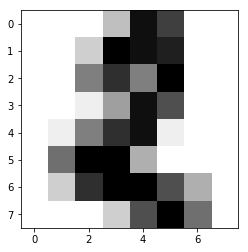

In [7]:
plot = lambda image: pl.imshow(image, cmap=pl.cm.gist_gray_r)
[plot(image) for image in digits.images[:3]]

hm, only the last image is plotted by default

In [8]:
data = digits.images.reshape((digits.images.shape[0], -1))
print(data[:2])

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]


Apparently, trailing underscore **is** a convention:
> Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

```python
>>> estimator.estimated_param_ 
```

## Section 2

A neat method **np.unique**:

In [9]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
unique_y = np.unique(iris_y)
print('%d labels have only %d unique values: %s' % (len(iris_y), len(unique_y), unique_y))

150 labels have only 3 unique values: [0 1 2]


![alt text](http://s2.quickmeme.com/img/51/5104093ba6225caffcd066fa25d7d120a6923dc624061bbf9900c78b3e0815d3.jpg)

In [10]:
diabetes = datasets.load_diabetes()

In [11]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [12]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [13]:
>>> from sklearn import linear_model
>>> regr = linear_model.LinearRegression()
>>> regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
>>> print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [15]:
>>> # The mean square error
>>> np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898207

In [16]:
>>> # Explained variance score: 1 is perfect prediction
>>> regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905746

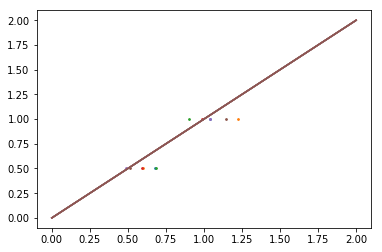

In [17]:
>>> X = np.c_[ .5, 1].T
>>> y = [.5, 1]
>>> test = np.c_[ 0, 2].T
>>> regr = linear_model.LinearRegression()

>>> import pylab as pl
>>> pl.figure() 

>>> np.random.seed(0)
>>> for _ in range(6): 
...    this_X = .1*np.random.normal(size=(2, 1)) + X
...    regr.fit(X, y)
...    pl.plot(test, regr.predict(test))
...    pl.scatter(this_X, y, s=3)

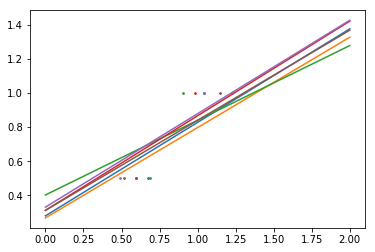

In [18]:
>>> regr = linear_model.Ridge(alpha=.1)

>>> pl.figure() 

>>> np.random.seed(0)
>>> for _ in range(6): 
...    this_X = .1*np.random.normal(size=(2, 1)) + X
...    regr.fit(this_X, y)
...    pl.plot(test, regr.predict(test))
...    pl.scatter(this_X, y, s=3)

Automatically created module for IPython interactive environment


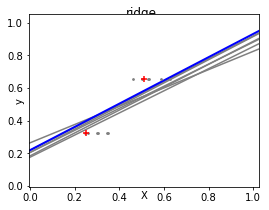

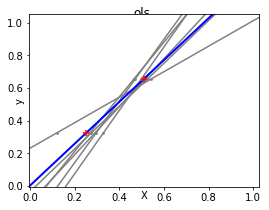

In [19]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

fignum = 1
for name, clf in classifiers.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.title(name)
    ax = plt.axes([.12, .12, .8, .8])

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=3, c='.5', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()

In [20]:
np.logspace(1, 5, 10, base=2)

array([  2.        ,   2.72158   ,   3.70349885,   5.0396842 ,
         6.85795186,   9.33223232,  12.69920842,  17.28095582,
        23.51575188,  32.        ])

### 2.2.4.1. Excercice: classification of digits

In [25]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [64]:
train_X = X_digits[:-180]
train_y = y_digits[:-180]

len(train_y)

1617

In [60]:
test_X = X_digits[-180:]
test_y = y_digits[-180:]

len(test_y)

180

let's try neighbours first

In [62]:
knn = neighbors.KNeighborsClassifier()

In [65]:
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
help(knn.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [68]:
knn.score(test_X, test_y)

0.96111111111111114